In [120]:
import pandas as pd
import numpy as np
import rdkit as rdk
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import rc

In [121]:
matplotlib.rcParams['figure.dpi'] = 600

# Data Manipulation

#### GNPS

In [122]:
gnps = pd.read_csv('GNPS/all_adducts.csv')
gnps['db'] = ['gnps' for ind in gnps.index]
print(gnps.shape)
gnps.drop_duplicates()
# get rid of the only-mass ones
gnps = gnps[gnps.adduct.str.contains("M")].copy() 
print(gnps.shape)
gnps.head()

(9312, 6)
(9287, 6)


adduct  parent_mass                    name inchikey smile    db
0    M+H      981.400  3-Des-Microcystein_LR       NaN   NaN  gnps
1    M+H      940.250             Hoiamide B       NaN   NaN  gnps
2    M+H      456.100          Malyngamide C       NaN   NaN  gnps
3    M+H      545.000             Scytonemin       NaN   NaN  gnps
4    M+H      314.116      Salinisporamide A       NaN   NaN  gnps

#### MassBank of North America

In [123]:
mona = pd.read_csv('MassBank_LCMS/all_adducts.csv')
mona['db'] = ['mona' for ind in mona.index]
print(mona.shape)
mona.drop_duplicates()
# get rid of the only-mass ones
#mona = mona[mona.adduct.str.contains("M")].copy() 
#print(mona.shape)
mona = mona.loc[mona.adduct.str.contains("M", na=False)].copy().reset_index()
print(mona.shape)
mona.head()

(129110, 7)
(120034, 8)


index  adduct  parent_mass                  name       formula  \
0      0  [M+H]+   284.013474          Sulfaclozine  C10H9ClN4O2S   
1      1  [M+H]+   284.013474  Sulfachlorpyridazine  C10H9ClN4O2S   
2      2  [M+H]+   278.083747         Sulfadimidine   C12H14N4O2S   
3      3  [M+H]+   278.083747        Sulfamethazine   C12H14N4O2S   
4      4  [M+H]+   278.083747        Sulfamethazine   C12H14N4O2S   

                                            inchikey  \
0  InChI=1S/C10H9ClN4O2S/c11-9-5-13-6-10(14-9)15-...   
1  InChI=1S/C10H9ClN4O2S/c11-9-5-6-10(14-13-9)15-...   
2  InChI=1S/C12H14N4O2S/c1-8-7-9(2)15-12(14-8)16-...   
3  InChI=1S/C12H14N4O2S/c1-8-7-9(2)15-12(14-8)16-...   
4  InChI=1S/C12H14N4O2S/c1-8-7-9(2)15-12(14-8)16-...   

                                       smile    db  
0          c1cc(ccc1N)S(=O)(=O)Nc2cncc(n2)Cl  mona  
1          c1cc(ccc1N)S(=O)(=O)Nc2ccc(nn2)Cl  mona  
2        Cc1cc(nc(n1)NS(=O)(=O)c2ccc(cc2)N)C  mona  
3  CC1=CC(C)=NC(NS(=O)(=O)C2=CC=C(N)C=C2)=N1  mona  
4  CC1=CC(C)=NC(NS(=O)(=O)C2=CC=C(N)C=C2)=N1  mona

#### NIST

In [124]:
nist = pd.read_csv('NIST/all_adducts.tsv', sep='\t', low_memory=False)
nist['db'] = ['nist' for ind in nist.index]
print(nist.shape)
nist.drop_duplicates()
# get rid of the only-mass ones
nist = nist[nist.adduct.str.contains("M")].copy() 
print(nist.shape)
nist.head()

(699121, 7)
(597201, 7)


adduct  parent_mass         name                    synonyms     formula  \
0  [M+H]+   375.248169  Thr-Lys-Lys     TKK;threonyllysyllysine  C16H33N5O5   
1  [M+H]+   375.248169  Lys-Thr-Lys     KTK;lysylthreonyllysine  C16H33N5O5   
2  [M+H]+   376.159414  Asp-Asp-Lys  DDK;aspartylaspartyllysine  C14H24N4O8   
3  [M+H]+   376.170647  Asp-Ser-Arg   DSR;aspartylserylarginine  C13H24N6O7   
4  [M+H]+   376.170647  Ser-Asp-Arg   SDR;serylaspartylarginine  C13H24N6O7   

                      inchikey    db  
0  MGJLBZFUXUGMML-UHFFFAOYSA-N  nist  
1  YKBSXQFZWFXFIB-UHFFFAOYSA-N  nist  
2  CELPEWWLSXMVPH-UHFFFAOYSA-N  nist  
3  ZBYLEBZCVKLPCY-UHFFFAOYSA-N  nist  
4  CNIIKZQXBBQHCX-UHFFFAOYSA-N  nist

### Combine the above 3 databases

In [125]:
#make them all have the same columns
gnps['formula'] = [np.nan for ind in gnps.index]
gnps['synonyms'] = [np.nan for ind in gnps.index]
mona['synonyms'] = [np.nan for ind in mona.index]
nist['smile'] = [np.nan for ind in nist.index]

gnps = gnps[['adduct', 'parent_mass', 'name', 'synonyms', 'inchikey', 'smile', 'formula',
       'db']]

mona = mona[['adduct', 'parent_mass', 'name', 'synonyms', 'inchikey', 'smile', 'formula',
       'db']]

nist = nist[['adduct', 'parent_mass', 'name', 'synonyms', 'inchikey', 'smile', 'formula',
       'db']]
df = pd.concat([gnps, mona, nist])
print(df.shape)
df.head()

(726522, 8)


adduct  parent_mass                    name synonyms inchikey smile formula  \
0    M+H      981.400  3-Des-Microcystein_LR       NaN      NaN   NaN     NaN   
1    M+H      940.250             Hoiamide B       NaN      NaN   NaN     NaN   
2    M+H      456.100          Malyngamide C       NaN      NaN   NaN     NaN   
3    M+H      545.000             Scytonemin       NaN      NaN   NaN     NaN   
4    M+H      314.116      Salinisporamide A       NaN      NaN   NaN     NaN   

     db  
0  gnps  
1  gnps  
2  gnps  
3  gnps  
4  gnps

In [126]:
# remove adducts that are in nonstandard from (ex [M+H+2i]+,[M+H-H2O+2i]+ )
df = df[~df.adduct.str.contains('[\+\-0-9]i')]

In [127]:
df.columns

Index(['adduct', 'parent_mass', 'name', 'synonyms', 'inchikey', 'smile',
       'formula', 'db'],
      dtype='object')

In [128]:
# if it doesn't have a mass, we don't want it
df = df[df.parent_mass.notna()].copy()

In [129]:
df.count()

adduct         710106
parent_mass    710106
name           710106
synonyms       503388
inchikey       575448
smile           74864
formula        700819
db             710106
dtype: int64

### Get the charge information

In [130]:
# Code to get charges
# charge dict is dealing with the common adducts appearing in GNPS that don't have the standard adduct format
# put things with >1 appearance by hand into this dict
charge_dict = {'[M-H]':-1,'[M+H]':1, '[M+2H]':2,'[M+Na]':1, '[M+K]':1, 
               'M+H':1, 'M+Na':1, 'M-H':-1, 'M+K':1, 'M+2H':2, 'M+NH4':1, 'M+H-H2O':1,
              'M+H+Na':2, 'M+H+K':2, 'M+Na+H2O':1, 'M+Na+K-H':1, 'M+2K-H':1, 'M+K+H2O':1, 'M+3H':3,
              'M+2Na':2, 'M+Cl':-1, 'M+ACN+H':1, 'M-NH3+H':1,'M+Na+2K-2H':1,'M+2K':2,'M+Na+K':2, 'M+2Na+K-2H':1}

def get_charge(adduct):
    try:
        charge = adduct.split(']')[1]
    except:
        return aget_charge(adduct)
    if charge == '+':
        return 1
    elif charge == '-':
        return -1
    else:
        try:
            x = int(charge[0])
        except:
            return aget_charge(adduct)
        if charge[1] == '+':
            return x
        else: #charge[1] is -
            return -1*x

def aget_charge(adduct):
    if adduct in charge_dict: # for things formatted w/0 +/-
        return charge_dict[adduct]
    else:
        print(adduct)
        return np.nan

In [131]:
df['adduct_orig'] = df.adduct
df['adduct'] = [adduct.rstrip('\n').lstrip(' ').rstrip(' ') for adduct in df['adduct']]
df['inchikey'] = [str(key).rstrip('\n') for key in df['inchikey']]
df['charge'] = [get_charge(adduct) for adduct in df.adduct]
df['adduct'] = [adduct.lstrip('[').split(']')[0] for adduct in df.adduct]
df.head()

MCl37+H
MCl37+Na
MBr81+H
MBr81+Na
MBr81+H
MCl37+H
M-18
M+-H20+H
M+-Na
MCl37+2Na
MCl37+H
MCl37+Na
M+2H/2
MBr81+H
M2Br81+H
MCl37+H
M2Cl37+H
MCl37+H
M2Cl37+Na
M3Cl37+Na
MCl37+Na
M-18
MS+H
MS+H
MS+Na
MBr+H
MBr+Na
MS34+Na
M+?
MCl+H
MCl+Na
MCl+2Na
M-18
M-NH3
M+HCl
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M
M-2H
M-2H
M+Na-2H
M+OH
M-H2O
M+K+Phos
M+2Na-H
M+H-H20
M+23
M+H-99
2M+Na
M
2M+H
2M+H
2M+H
2M+Na
2M+H
2M+H
2M+H
2M+H
2M+H
2M+H
2M+H
2M+H
2M+H
2M+H
2M+H
2M+Na
2M+H
2M+H
2M+H
2M+H
2M+H
M-MeOH+H
M-H2O+H
M+
M+
M+
2M+H
2M+H
2M+H
2M+H
2M+H
2M+H
2M+H
2M+H
2M+H
[M-H2O]
[M+CH3COO]-/[M-CH3]-
[M-2H]--
[M-2H]--
[M-2H]--
[M-2H]--
[M-2H]--
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M+2H]++
[M]++
[M]++
[M]

adduct  parent_mass                    name synonyms inchikey smile formula  \
0    M+H      981.400  3-Des-Microcystein_LR       NaN      nan   NaN     NaN   
1    M+H      940.250             Hoiamide B       NaN      nan   NaN     NaN   
2    M+H      456.100          Malyngamide C       NaN      nan   NaN     NaN   
3    M+H      545.000             Scytonemin       NaN      nan   NaN     NaN   
4    M+H      314.116      Salinisporamide A       NaN      nan   NaN     NaN   

     db adduct_orig  charge  
0  gnps         M+H     1.0  
1  gnps         M+H     1.0  
2  gnps         M+H     1.0  
3  gnps         M+H     1.0  
4  gnps         M+H     1.0

In [132]:
# drop anything that's missing a charge idenitication
df = df[df.charge.notna()].copy()

In [133]:
full_df = df.copy()

# Cumulative Sum 

In [134]:
df = df.filter(items=['adduct','charge'])

In [135]:
def plot_cumulative_percent_coverage(df, cutoff, subset):
    # df should have 'adduct' and 'charge' column
    # cutoff 
    #   if between 0 and 1, read as a percentile (aka show adducts)
    #   if int > 1, taken as # of top x adducts to use
    # subset options: positive, negative, all
    df['charge'] = [float(charge) for charge in df.charge]
    if subset == 'pos':
        subsetdf = df[df.charge > 0].copy()
        mode = 'Positive'
    elif subset == 'neg':
        subsetdf = df[df.charge < 0].copy()
        mode = 'Negative'
    else:
        #use all
        print("Using positive and negative")
        subsetdf = df
        mode = 'All'
    #get the df ready
    percoveragedf = (subsetdf.adduct.value_counts()/subsetdf.adduct.value_counts().sum()).to_frame()
    percoveragedf.columns = ['percent_coverage']
    cumsumdf = percoveragedf.percent_coverage.cumsum().to_frame()
    cumsumdf.reset_index(inplace=True)
    cumsumdf.columns = ['adduct','cumsum']
    cumsumdf['index'] = [str(num) for num in cumsumdf.index]
    # wait until after cumsum calculation to reset percent coverage index
    percoveragedf.reset_index(inplace=True)
    percoveragedf.columns = ['adduct','percent_coverage']
    totaldf = cumsumdf.merge(percoveragedf, on='adduct')
    #quantile?
    if cutoff < 1.0:
        #num = totaldf.percent_coverage.quantile(q=cutoff)
        num = cutoff
        cutoffdf = totaldf[totaldf['cumsum'] <= num] # things at or above the requested quantile
    else:
        #cutoff is an integer number 
        cutoffdf = totaldf[totaldf.index < cutoff]
    totalLen = len(totaldf)
    subsetLen = len(cutoffdf) - 1 # added one so it can plot a single adduct
    
    
    
    cutoffdf.plot.line(y='cumsum', x='index', drawstyle='steps-post', title='{} Adducts of {} Total in {} Mode'.format(subsetLen+1, totalLen, mode))
    plt.xlabel('Number of adducts', fontweight='bold')
    plt.ylabel('Cumulative Sum',fontweight='bold')
    plt.xticks(fontweight='normal')
    plt.yticks(fontweight='normal')
    print(cutoffdf)
    #cutoffdf.head()
    #cutoffdf.to_csv('adduct_ninetieth_pos.csv')

In [136]:
def cumulative_percent_coverage(df, cutoff, subset):
    # df should have 'adduct' and 'charge' column
    # cutoff 
    #   if between 0 and 1, read as a percentile (aka show adducts)
    #   if int > 1, taken as # of top x adducts to use
    # subset options: positive, negative, all
    df['charge'] = [float(charge) for charge in df.charge]
    if subset == 'pos':
        subsetdf = df[df.charge > 0].copy()
        mode = 'Positive'
    elif subset == 'neg':
        subsetdf = df[df.charge < 0].copy()
        mode = 'Negative'
    else:
        #use all
        print("Using positive and negative")
        subsetdf = df
        mode = 'All'
    #get the df ready
    percoveragedf = (subsetdf.adduct.value_counts()/subsetdf.adduct.value_counts().sum()).to_frame()
    percoveragedf.columns = ['percent_coverage']
    cumsumdf = percoveragedf.percent_coverage.cumsum().to_frame()
    cumsumdf.reset_index(inplace=True)
    cumsumdf.columns = ['adduct','cumsum']
    cumsumdf['index'] = [str(num) for num in cumsumdf.index]
    # wait until after cumsum calculation to reset percent coverage index
    percoveragedf.reset_index(inplace=True)
    percoveragedf.columns = ['adduct','percent_coverage']
    totaldf = cumsumdf.merge(percoveragedf, on='adduct')
    #quantile?
    if cutoff < 1.0:
        #num = totaldf.percent_coverage.quantile(q=cutoff)
        num = cutoff
        cutoffdf = totaldf[totaldf['cumsum'] <= num] # things at or above the requested quantile
    else:
        #cutoff is an integer number 
        cutoffdf = totaldf[totaldf.index < cutoff]
    if cutoffdf.empty:
        cutoffdf = totaldf.sort_values('cumsum').head(1)
    return cutoffdf

Using positive and negative
      adduct    cumsum index  percent_coverage
0        M+H  0.386443     0          0.386443
1        M-H  0.527936     1          0.141493
2    M+H-H2O  0.598197     2          0.070261
3       M+Na  0.651224     3          0.053027
4       M+2H  0.694950     4          0.043726
5       2M+H  0.714279     5          0.019328
6       M+3H  0.731346     6          0.017067
7      M+NH4  0.746631     7          0.015285
8       2M-H  0.759219     8          0.012588
9       M-2H  0.771498     9          0.012278
10  M+H-2H2O  0.783235    10          0.011737
11      M+4H  0.794172    11          0.010937


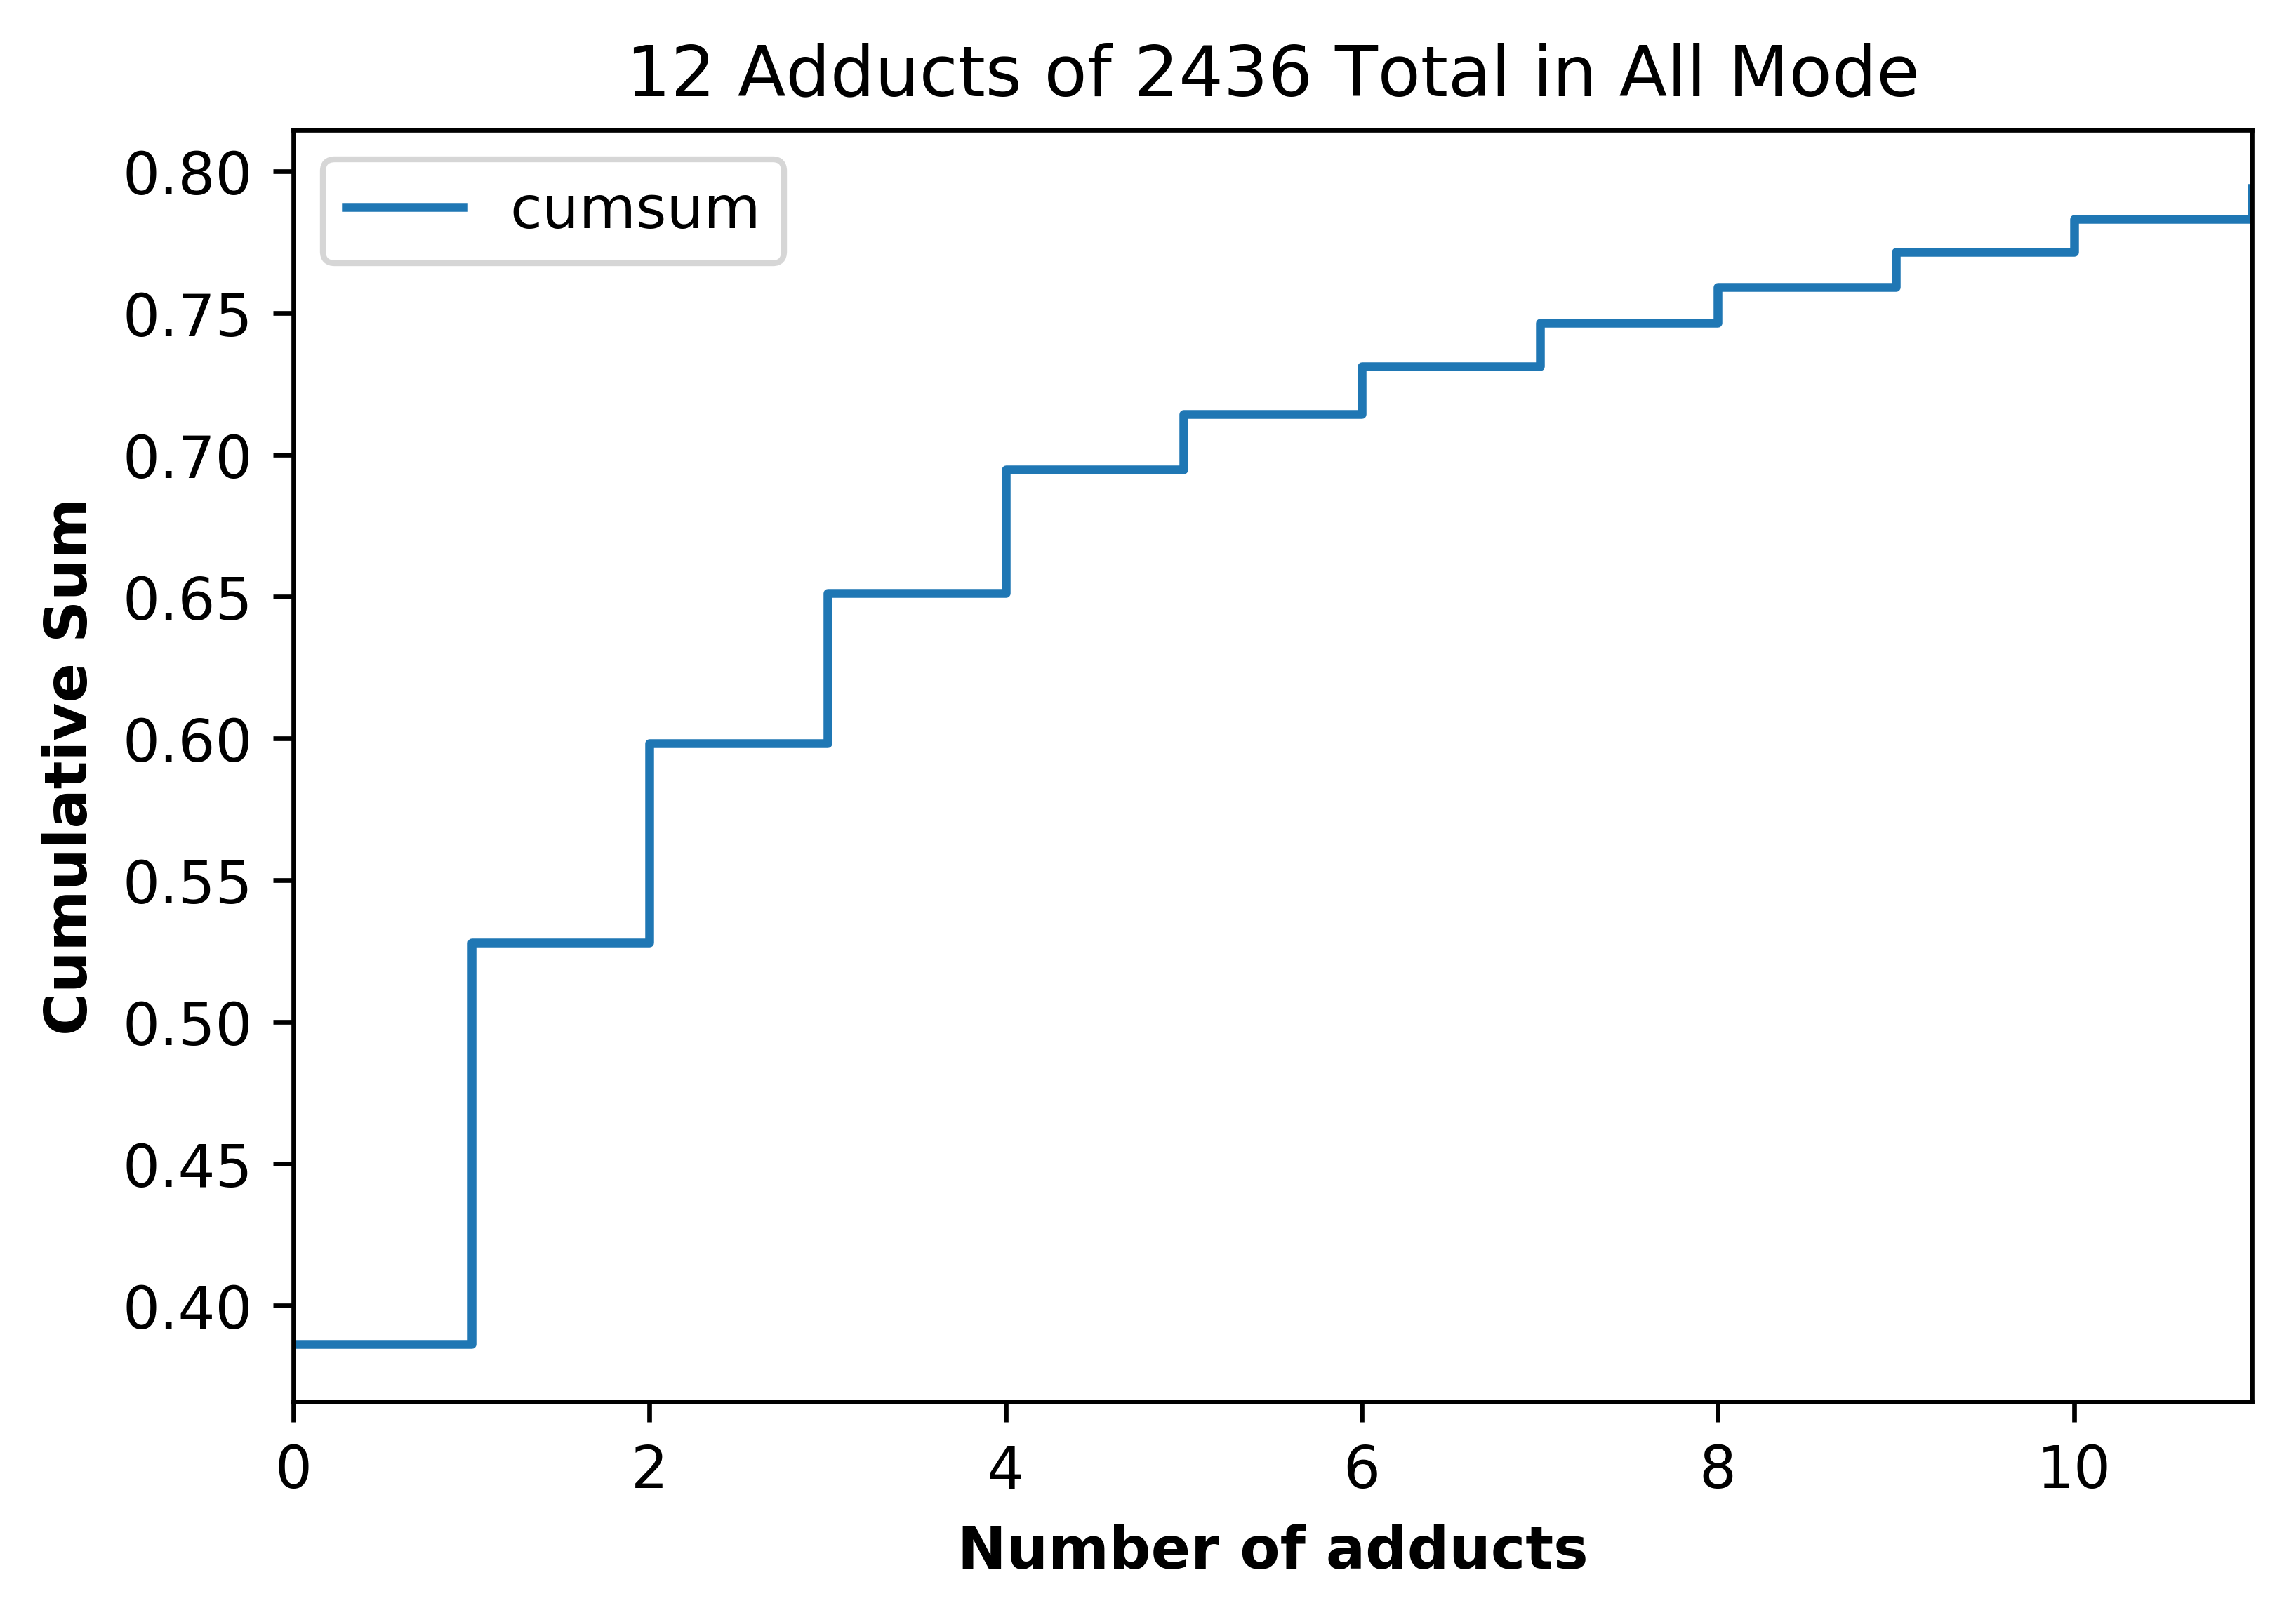

In [137]:
plot_cumulative_percent_coverage(df, 12, 'x')

Using positive and negative


C:\Users\blum443\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\plotting\_core.py:1001: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=0.0, right=0.0
  ax.set_xlim(left, right)


  adduct    cumsum index  percent_coverage
0    M+H  0.386443     0          0.386443


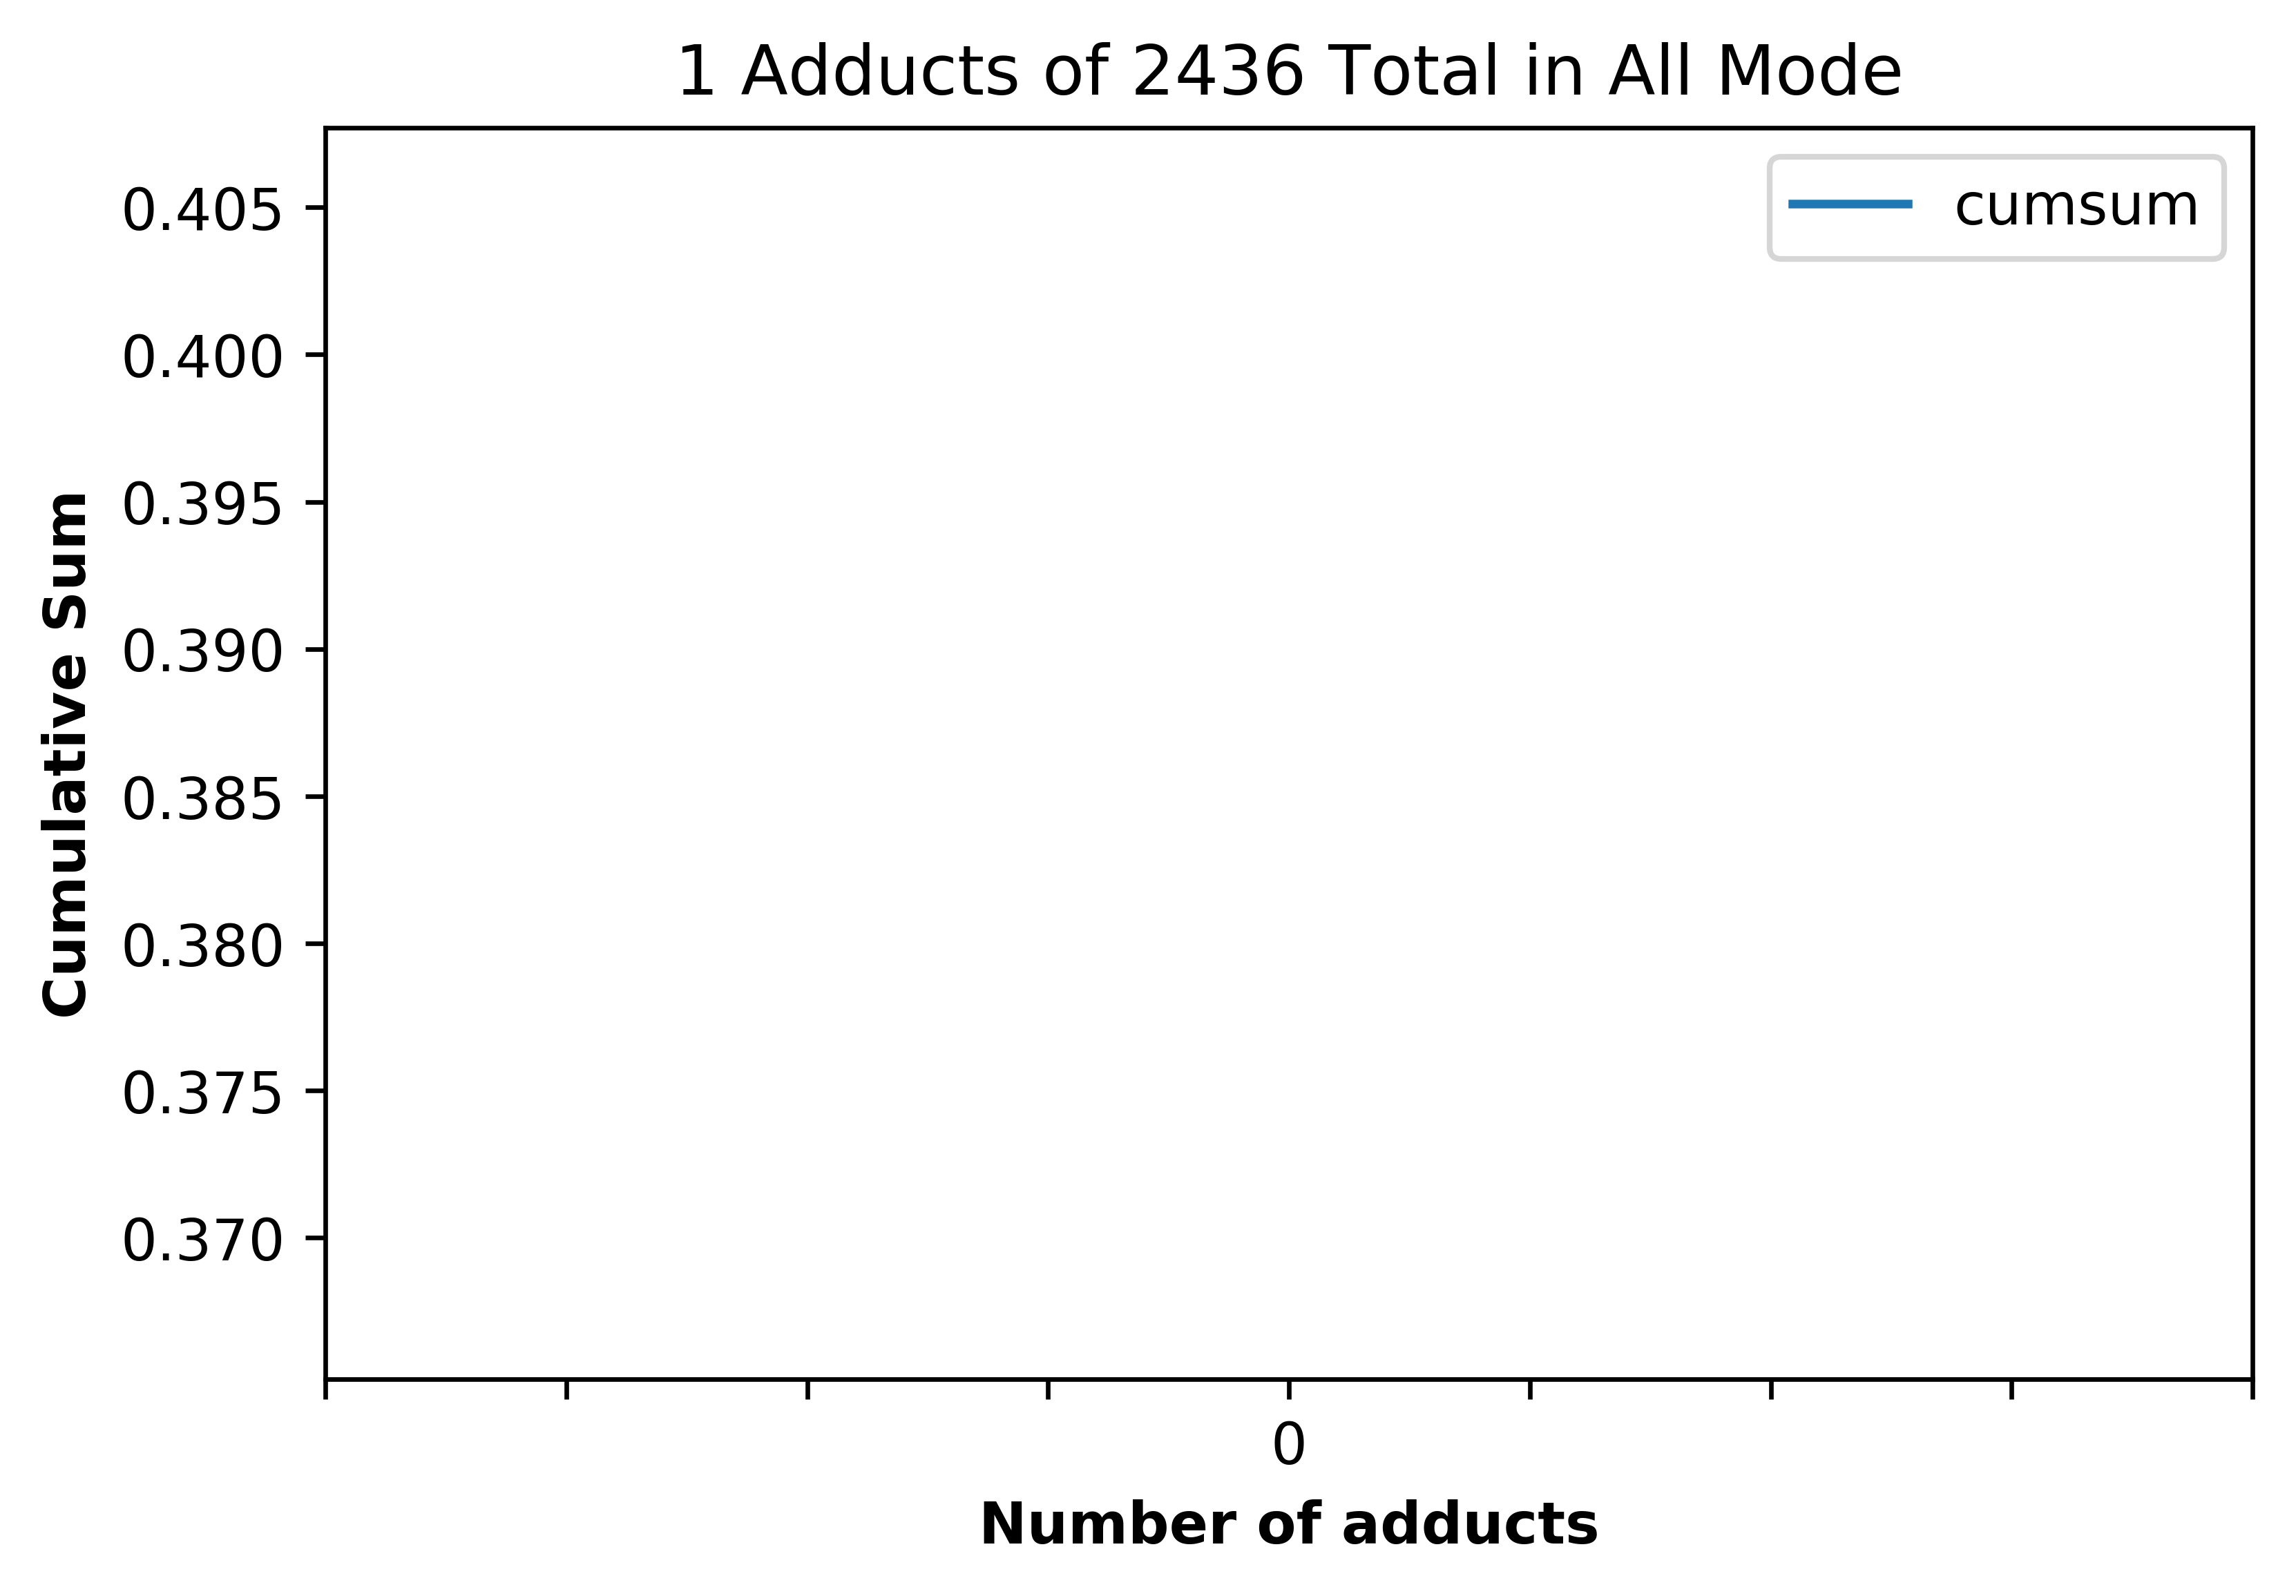

In [138]:
plot_cumulative_percent_coverage(df, 1, 'x')

In [139]:
all_df = cumulative_percent_coverage(df, 3000, 'x')
all_df.head()

Using positive and negative


adduct    cumsum index  percent_coverage
0      M+H  0.386443     0          0.386443
1      M-H  0.527936     1          0.141493
2  M+H-H2O  0.598197     2          0.070261
3     M+Na  0.651224     3          0.053027
4     M+2H  0.694950     4          0.043726

In [140]:
all_df = all_df.set_index('adduct', drop=True)

In [141]:
add_df = pd.read_csv('../msac/msac/example_data/adduct_list_full_original.csv',index_col=0)
add_df['adduct'] = [adduct.lstrip('[').split(']')[0] for adduct in add_df.adduct]
add_df.head()

adduct  charge
0      M+H       1
1     M+Na       1
2     2M+H       1
3  M+H-H2O       1
4     2M-H      -1

In [142]:
add_df = add_df.set_index('adduct', drop=True)

In [143]:
print(add_df.shape, all_df.shape)

(2342, 1) (2436, 3)


In [144]:
add_df.head()

charge
adduct         
M+H           1
M+Na          1
2M+H          1
M+H-H2O       1
2M-H         -1

In [152]:
add_df.join(all_df['percent_coverage'], how='inner').reset_index(drop=False).drop_duplicates()#.to_csv('../msac/msac/example_data/adduct_list_full.csv', index=False)

In [150]:
add_df.join(all_df['percent_coverage'], how='inner').reset_index(drop=False).drop_duplicates()

adduct  charge  percent_coverage
0        2M+ClO3      -1          0.000003
1        2M+ClO4      -1          0.000001
2           2M+H       1          0.019328
3     2M+H+CH3OH       1          0.000028
4           2M+K       1          0.000024
5        2M+KSO4      -1          0.000001
6         2M+NH4       1          0.000061
7          2M+Na       1          0.001185
8      2M-2H+3Na       1          0.000073
9        2M-2H+K      -1          0.000013
10      2M-2H+Na      -1          0.000103
11     2M-3H+2Na      -1          0.000018
12     2M-4H+3Na      -1          0.000023
13          2M-H      -1          0.012588
14     2M-H+2NH4       1          0.000003
15      2M-H+2Na       1          0.000031
16       3M+ClO3      -1          0.000001
17       3M+ClO4      -1          0.000001
18          3M+H       1          0.001296
19          3M+K       1          0.000003
20         3M+Na       1          0.000086
21     3M-3H+2Na      -1          0.000027
22          3M-H      -1          0.000812
23          4M+K       1          0.000001
24        4M+NO3      -1          0.000003
25         4M+Na       1          0.000020
26          4M-H      -1          0.000028
27        5M+NO3      -1          0.000001
28         5M+Na       1          0.000001
29          5M-H      -1          0.000028
...          ...     ...               ...
2310   M-H-H2SO3      -1          0.000008
2311    M-H-H3NO      -1          0.000041
2312   M-H-H3O3P      -1          0.000027
2313   M-H-H3O4P      -1          0.000290
2314    M-H-H3ON      -1          0.000018
2315   M-H-H3PO4      -1          0.000003
2316   M-H-H4F2O      -1          0.000017
2317    M-H-H4N2      -1          0.000030
2318     M-H-H4O      -1          0.000013
2319    M-H-H4OS      -1          0.000024
2320    M-H-HCHO      -1          0.000001
2321     M-H-HCN      -1          0.000023
2322     M-H-HCl      -1          0.000462
2323      M-H-HF      -1          0.000134
2324     M-H-HN3      -1          0.000018
2325     M-H-HNO      -1          0.000013
2326    M-H-HNO2      -1          0.000031
2327      M-H-HO      -1          0.000006
2328    M-H-HO3P      -1          0.000013
2329    M-H-N2O2      -1          0.000011
2330     M-H-NH3      -1          0.000672
2331      M-H-NO      -1          0.000028
2332    M-H-NO4S      -1          0.000023
2333       M-H-O      -1          0.000010
2334     M-H-O2S      -1          0.000063
2335     M-H-O3S      -1          0.000128
2336      M-H-ON      -1          0.000004
2337     M-H-SO2      -1          0.000001
2338     M-H-SO3      -1          0.000063
2339    M-SCCl2F      -1          0.000003

[2337 rows x 3 columns]

# Graph charge frequency

In [26]:
def get_bin(mass,bins):
    small = bins[0]
    biggest = bins[-1]
    for ind, big in enumerate(bins[1:]):
        if mass > small and mass < big:
            return small
        elif mass > biggest:
            return biggest
        else:
            small = big

In [27]:
df = full_df.copy()

In [28]:
df['abs_charge'] = [np.absolute(charge) for charge in df['charge']]

In [29]:
bin_width = 100
bins = [bin_width*x for x in range(11)]
df['binNum'] = [get_bin(mass, bins) for mass in df['parent_mass']]

charge_type = 'abs_charge'
c = df.groupby( [ "binNum", charge_type] ).size().to_frame(name = 'counts')
c = (c / c.groupby(level=0).sum())*100 #  scales to 100
df2 = c.reset_index()

#add 0s for each charge type
to_append = []
for binNum in df2['binNum'].drop_duplicates():
    for charge in [1.0*i for i in range(1,len(df.abs_charge.unique())+1)]:
        if charge not in df2.loc[df2['binNum'] == binNum][charge_type].to_list():
            to_append.append([charge, binNum, 0.0])
df_all = pd.concat([df2, pd.DataFrame(to_append, columns=[charge_type,'binNum','counts'])], sort=True)
df_all = df_all.drop_duplicates(subset=['binNum',charge_type]).reset_index(drop=True)
df_all = df_all.sort_values(by=['binNum',charge_type]).reset_index(drop=True)

KeyError: 'parent_mass'

In [ ]:
# to make stacks https://python-graph-gallery.com/12-stacked-barplot-with-matplotlib/
# row is charge, col is bin
c1 = df_all.counts[df_all['abs_charge'] == 1.0].reset_index(drop=True)
c2 = df_all.counts[df_all['abs_charge'] == 2.0].reset_index(drop=True)
c3 = df_all.counts[df_all['abs_charge'] == 3.0].reset_index(drop=True)
c4 = df_all.counts[df_all['abs_charge'] == 4.0].reset_index(drop=True)
c5 = df_all.counts[df_all['abs_charge'] == 5.0].reset_index(drop=True)
c6 = df_all.counts[df_all['abs_charge'] == 6.0].reset_index(drop=True)
c7 = df_all.counts[df_all['abs_charge'] == 7.0].reset_index(drop=True)
c8 = df_all.counts[df_all['abs_charge'] == 8.0].reset_index(drop=True)
c9 = df_all.counts[df_all['abs_charge'] == 9.0].reset_index(drop=True)

In [ ]:
fig1, ax = plt.subplots()

# y-axis in bold
rc('font', weight='bold')

 
# The position of the bars on the x-axis
r = [binNum-100 for binNum in bins]

# Names of group and bar width
names = [str(binNum) for binNum in bins]
barWidth = bin_width


 # Create brown bars
p1 = plt.bar(r, c1, color='#8dd3c7', edgecolor='white', width=barWidth, align='edge')
# Create green bars (middle), on top of the firs ones
p2 = plt.bar(r, c2, bottom=c1, color='#ffffb3', edgecolor='white', width=barWidth, align='edge')
# Create 3rd row
# height of c1+c2, the other bars
h2 = np.add(c1, c2).tolist()
p3 = plt.bar(r, c3, bottom=h2, color='#bebada', edgecolor='white', width=barWidth, align='edge')
# Create 4th row
h3 = np.add(h2, c3).tolist()
p4 = plt.bar(r, c4, bottom=h3, color='#fb8072', edgecolor='white', width=barWidth, align='edge')
# Create 5th row
h4 = np.add(h3, c4).tolist()
p5 = plt.bar(r, c5, bottom=h4, color='#80b1d3', edgecolor='white', width=barWidth, align='edge')
# Create 6th row
h5 = np.add(h4, c5).tolist()
p6 = plt.bar(r, c6, bottom=h5, color='#fdb462', edgecolor='white', width=barWidth, align='edge')
# Create 7th row
h6 = np.add(h5, c6).tolist()
p7 = plt.bar(r, c7, bottom=h6, color='#b3de69', edgecolor='white', width=barWidth, align='edge')
# Create 8th row
h7 = np.add(h6, c7).tolist()
p8 = plt.bar(r, c8, bottom=h7, color='#fccde5', edgecolor='white', width=barWidth, align='edge')
# Create 9th row
h8 = np.add(h7, c8).tolist()
p9 = plt.bar(r, c9, bottom=h8, color='#d9d9d9', edgecolor='white', width=barWidth, align='edge')

# Custom X axis
plt.xticks(r, names, fontweight='normal', ha='center')
plt.yticks(fontweight='normal')
#plt.setp(ax.xaxis.get_majorticklabels(), ha='right')
ax.tick_params(axis='x',which='major')
plt.xlabel("Parent Mass", fontweight='bold')
plt.ylabel("Percent of spectra", fontweight='bold')
colors = [p1[0],p2[0],p3[0],p4[0],p5[0],p6[0],p7[0],p8[0],p9[0]]
nums = ['1','2','3','4','5','6','7','8','9']
colors = colors[::-1]
nums = nums[::-1]
plt.legend(colors,nums, loc=3)
#plt.legend([p1[0],p2[0],p3[0],p4[0]],['1','2','3','4',], loc=3)
plt.xticks()
# Show graphic
plt.show()

In [ ]:
bins

In [ ]:
plt.close()

# Mass/Charge distribution

In [30]:
df = full_df.copy()

### Looking for how many spectra have a certain charge

(array([     0., 100000., 200000., 300000., 400000., 500000., 600000.]),
 <a list of 7 Text yticklabel objects>)

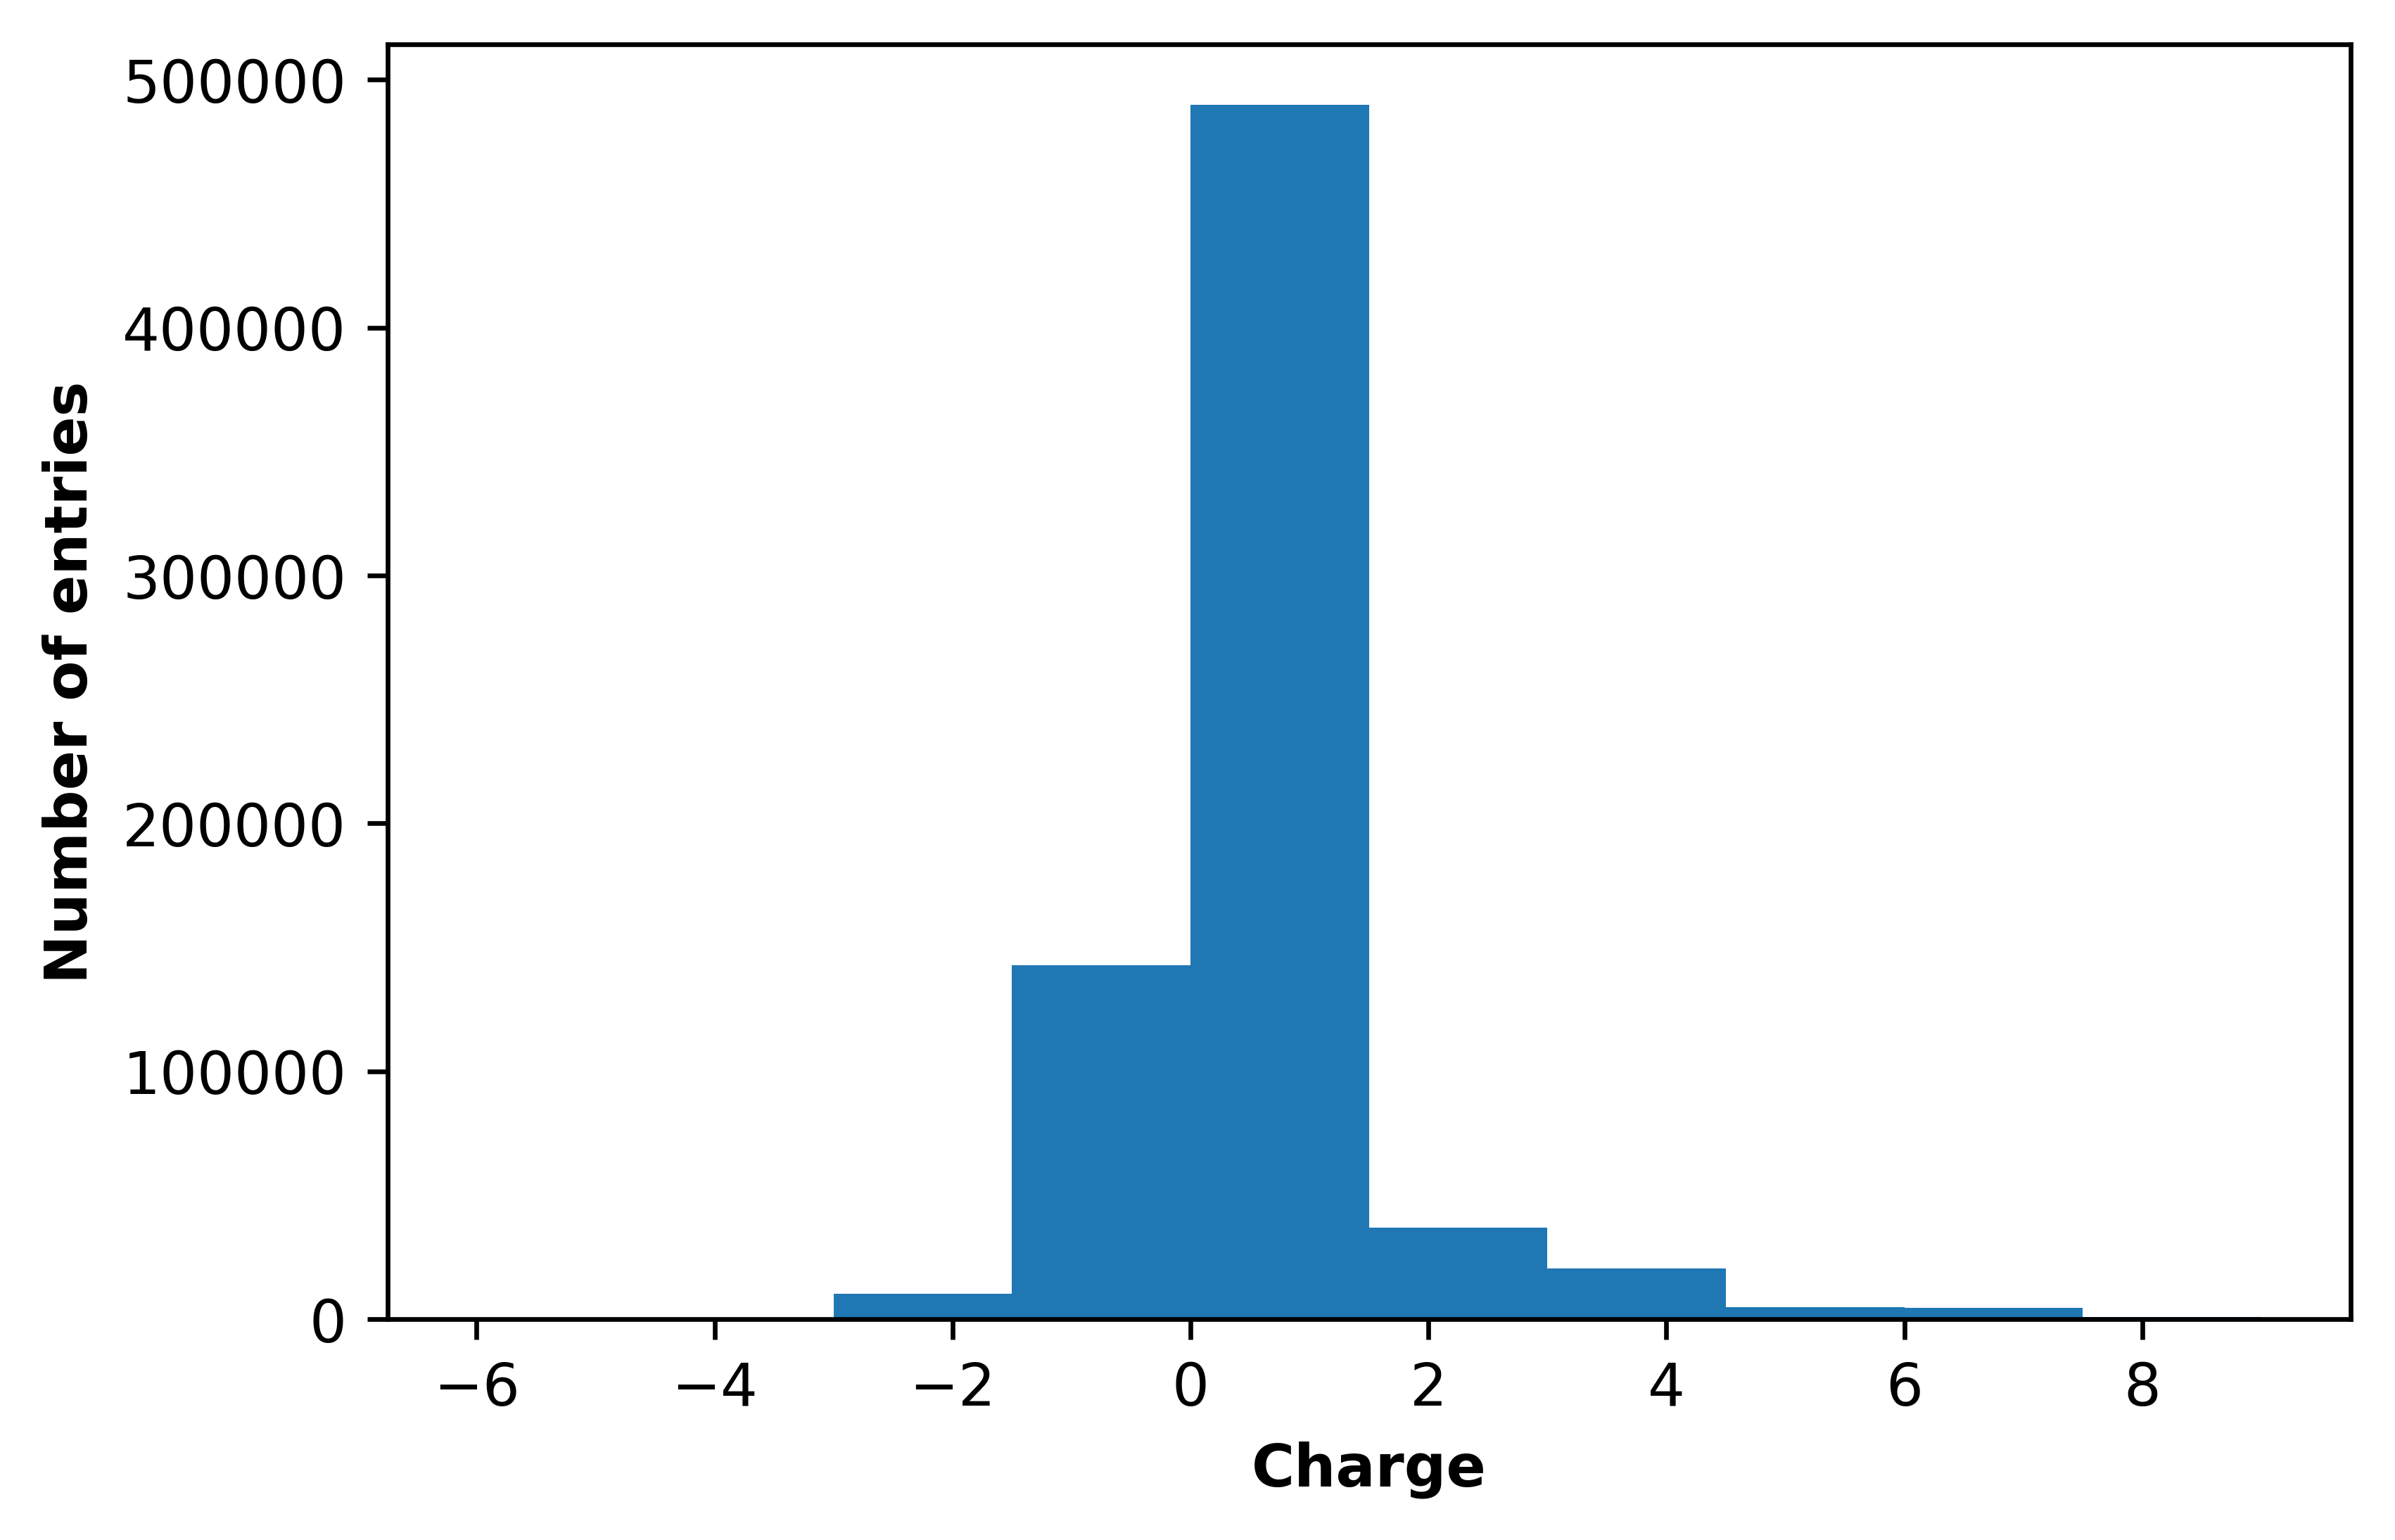

In [31]:
plt.hist(df.charge)
plt.xlabel('Charge', fontweight='bold')
plt.ylabel('Number of entries', fontweight='bold')
plt.xticks(fontweight='normal')
plt.yticks(fontweight='normal')

In [32]:
df.charge.value_counts().sort_values()

-5.0        11
-6.0        18
-4.0        41
 9.0       154
 8.0       509
-3.0       973
 7.0      1513
 6.0      2941
 5.0      4671
 4.0      7763
-2.0      9163
 3.0     12667
 2.0     36721
-1.0    142811
 1.0    489827
Name: charge, dtype: int64

### Number of molecules with at least one spectra at that charge

In [ ]:
plt.hist(df.drop_duplicates(subset=['inchikey','charge']).charge)
plt.xlabel('Charge', fontweight='bold')
plt.ylabel('Number of entries', fontweight='bold')
plt.xticks(fontweight='normal')
plt.yticks(fontweight='normal')

In [ ]:
df.drop_duplicates(subset=['inchikey','charge']).charge.value_counts()

In [ ]:
### Number of molecules (by smile?)

In [ ]:
df.drop_duplicates(subset=['inchikey','charge']).charge.value_counts().sort_values()

### Looking at Mass distribution under 2000 Da (small molecules)

In [ ]:
plt.hist(df[df.parent_mass<2000].parent_mass, bins=20)
plt.xlabel('Parent Mass', fontweight='bold')
plt.ylabel('Number of entries', fontweight='bold')
plt.xticks(fontweight='normal')
plt.yticks(fontweight='normal')
plt.show()

### Looking at mass distribution of multiply-charged adducts in parent mols under 2000 Da

In [ ]:
plt.hist(df[(df.parent_mass<2000) & (abs(df.charge)>1)].parent_mass, bins=20)
plt.xlabel('Parent Mass', weight='bold')
plt.ylabel('Number of entries', weight='bold')
plt.xticks(fontweight='normal')
plt.yticks(fontweight='normal')
plt.show()

In [ ]:
df.drop_duplicates(subset='inchikey')